# Alexander Kapturov - Machine Learning Engineer
### - [My LinkedIn profile](https://www.linkedin.com/in/alexanderkapturov/)
### - [My Kaggle profile](https://www.kaggle.com/kapturovalexander)
### - [My GitHub profile](https://github.com/Ultraluxe25)

## <span style="color: orange">My completion of the test task for the position of Data Scientist for BNB</span>

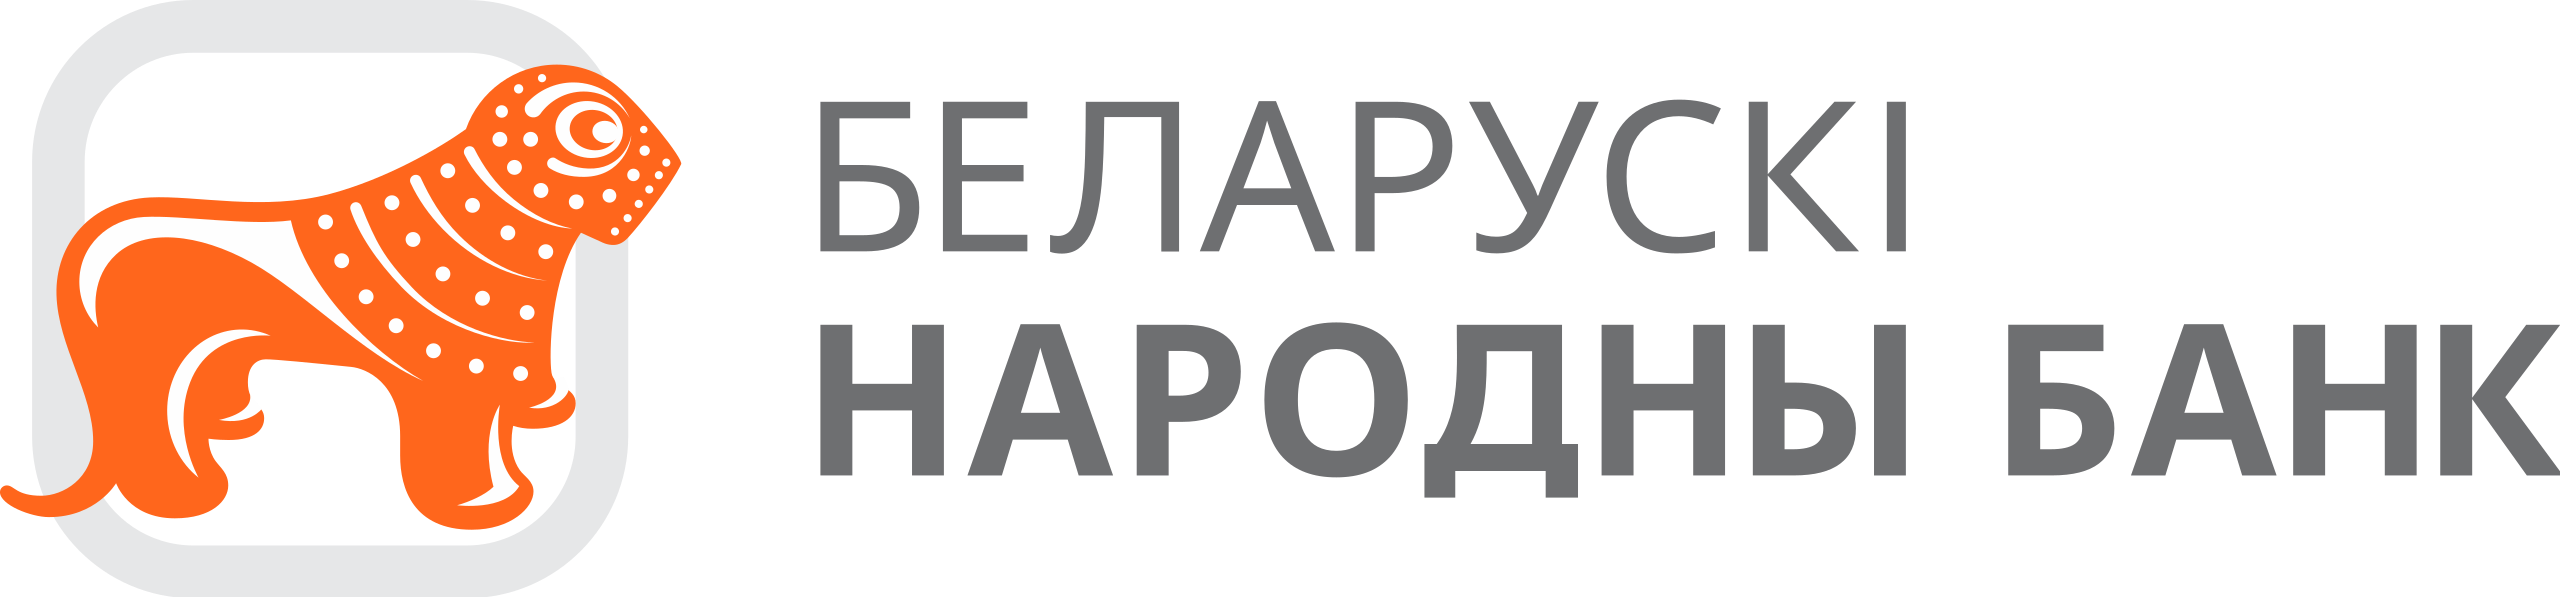

Задание 1 (файл tmp002):

Есть датасет с фичами и целевой переменной «Просрочка дни»
Необходимо открыть датасет в питоне 
Построить модель (лог регрессия) предсказания дефолта должника. 
Дефолт – просрочка свыше 90 дней по должнику.
Построить графики ROC и PR кривой. 
Оценить качество модели и значимость фичей

### <span style="color: orange">Import libraries</span>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### <span style="color: orange">Open data into pandas.dataframe data structure and look on the first 5 rows</span>

In [4]:
data = pd.read_excel('bnb_data.xlsx', )
data.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


### <span style="color: orange">EDA</span>

In [5]:
data.shape

(18420, 18)

#### There are 18 features and 18420 observations (borrowers)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Задолженность              18420 non-null  float64       
 1   Просрочка, дни             18420 non-null  int64         
 2   Первоначльный лимит        18420 non-null  float64       
 3   BIRTHDATE                  18420 non-null  datetime64[ns]
 4   SEX                        18420 non-null  object        
 5   EDU                        18420 non-null  object        
 6   INCOME                     18420 non-null  float64       
 7   TERM                       18420 non-null  int64         
 8   Рейтинг кредитной истории  17488 non-null  object        
 9   LV_AREA                    16297 non-null  object        
 10  LV_SETTLEMENTNAME          18374 non-null  object        
 11  INDUSTRYNAME               18420 non-null  object        
 12  PDN 

In [8]:
data.isna().sum()

Задолженность                   0
Просрочка, дни                  0
Первоначльный лимит             0
BIRTHDATE                       0
SEX                             0
EDU                             0
INCOME                          0
TERM                            0
Рейтинг кредитной истории     932
LV_AREA                      2123
LV_SETTLEMENTNAME              46
INDUSTRYNAME                    0
PDN                             0
CLIENTID                        0
SCORINGMARK                  1634
UNDERAGECHILDRENCOUNT           0
VELCOMSCORING                9531
FAMILYSTATUS                    0
dtype: int64

#### There are 5 features with empty (NaN) values. We have to fill them

# TODO:
1. Разобраться с тем что означает каждый из признаков
2. Отдельно работаем с каждым признаком и его значениями (заполняем пропуски, разбираемся в значениях, трансформируем название признака и его значения
3. Проводим статистические тесты для нахождения выбросов и их удаления (проверяем корреляцию для удаления не нужных признаков)
4. Проводим FE
5. Делим данные на train/valid/test, строим модель LogReg и подбираем гиперпараметры через Optuna
6. Проверяем результаты на метриках и строим графики с пояснениями результатов
7. Заканчиваем оформление репозитория и отправляем на проверку